In [1]:
#!/usr/bin/python
import tensorflow as tf
import matplotlib.pyplot as plt
 
 
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

import keras
import cv2
import numpy as np
import os
import math


2 Physical GPUs, 2 Logical GPUs


In [2]:
from keras.models import load_model

model = load_model('fer2013plus_model.h5')

(64, 64)


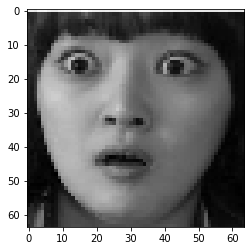

In [67]:
import cv2

original = cv2.imread('/home/piai/Desktop/asia_crop_data/validate/남자 배우 얼굴169.jpg', cv2.IMREAD_COLOR)
gray = cv2.imread('/home/piai/Desktop/server_crop_picture/training/행복띠-checkpoint.jpg',cv2.IMREAD_GRAYSCALE)
img = cv2.resize(gray, (64,64))
print(img.shape)
plt.imshow(img ,cmap='gray')

In [68]:
img = img.reshape((1,64,64,1))
img.shape

(1, 64, 64, 1)

In [69]:
pred_y = model.predict(img)
pred_y

array([[1.2737207e-32, 2.7978558e-32, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 7.2725270e-23, 0.0000000e+00]],
      dtype=float32)

In [76]:
if pred_y[0][0]==max(pred_y[0]):
    print("{'emotion':'중립'}")
elif pred_y[0][1]==max(pred_y[0]):
    print("{'emotion':'행복'}")
elif pred_y[0][2]==max(pred_y[0]):
    print("{'emotion':'놀라움'}")
elif pred_y[0][3]==max(pred_y[0]):
    print("{'emotion':'슬픔'}")
elif pred_y[0][4]==max(pred_y[0]):
    print("{'emotion':'분노'}")
elif pred_y[0][5]==max(pred_y[0]):
    print("{'emotion':'혐오'}")
elif pred_y[0][6]==max(pred_y[0]):
    print("{'emotion':'두려움'}")
elif pred_y[0][7]==max(pred_y[0]):
    print("{'emotion':'경멸'}")

{'emotion':'놀라움'}


In [74]:
if pred_y[0][0]==max(pred_y[0]):
    print('8')
elif pred_y[0][1]==max(pred_y[0]):
    print('7')
elif pred_y[0][2]==max(pred_y[0]):
    print('6')
elif pred_y[0][3]==max(pred_y[0]):
    print('5')
elif pred_y[0][4]==max(pred_y[0]):
    print('4')
elif pred_y[0][5]==max(pred_y[0]):
    print('3')
elif pred_y[0][6]==max(pred_y[0]):
    print('2')
elif pred_y[0][7]==max(pred_y[0]):
    print('1')

6


In [70]:
max(pred_y[0])

1.0

In [72]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 128)       0

In [27]:
import pandas as pd
df = pd.read_csv("/home/piai/Desktop/ferplus/fer2013new.csv")
df.head()

,Usage,Image name,neutral,happiness,surprise,sadness,anger,disgust,fear,contempt,unknown,NF
0,Training,fer0000000.png,4,0,0,1,3,2,0,0,0,0
1,Training,fer0000001.png,6,0,1,1,0,0,0,0,2,0
2,Training,fer0000002.png,5,0,0,3,1,0,0,0,1,0
3,Training,fer0000003.png,4,0,0,4,1,0,0,0,1,0
4,Training,fer0000004.png,9,0,0,1,0,0,0,0,0,0
